## Шаг 1: Контроль качества ридов

### Установка библиотеки fastqc
FastQC aims to provide a simple way to do some quality control checks on raw sequence data coming from high throughput sequencing pipelines.
https://www.bioinformatics.babraham.ac.uk/projects/fastqc/

For assembly we will be using a de Bruijn graph strategy, which breaks the reads up into
k-mers to facilitate assembly of correctly connected contigs. The size and type of these
k-mers are important parameters in de novo assembly, so it may be useful to spend some
time looking at how k-mers are distributed in our data.

In [1]:
# Команда создания окружения и установки ПО
# mamba create -n fastqc -c bioconda -c conda-forge -c defaults fastqc

# Версия ПО
# fastqc --> Version: 0.12.1

### Скачивание данных

In [ ]:
# SRR292678 - paired end, insert size 470 bp
# wget https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292678sub_S1_L001_R1_001.fastq.gz
# wget https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292678sub_S1_L001_R2_001.fastq.gz

# SRR292862 – mate pair, insert size 2 kb
# wget https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292862_S2_L001_R1_001.fastq.gz
# wget https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292862_S2_L001_R2_001.fastq.gz

# SRR292770 – mate pair, insert size 6 kb
# wget https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292770_S1_L001_R1_001.fastq.gz
# wget https://d28rh4a8wq0iu5.cloudfront.net/bioinfo/SRR292770_S1_L001_R2_001.fastq.gz

### Разархивирование данных

In [ ]:
# gzip -d SRR292678sub_S1_L001_R1_001.fastq.gz
# gzip -d SRR292678sub_S1_L001_R2_001.fastq.gz
# gzip -d SRR292770_S1_L001_R1_001.fastq.gz
# gzip -d SRR292770_S1_L001_R2_001.fastq.gz
# gzip -d SRR292862_S2_L001_R1_001.fastq.gz
# gzip -d SRR292862_S2_L001_R2_001.fastq.gz

### Получение отчетов

In [ ]:
# fastqc SRR292678sub_S1_L001_R1_001.fastq
# fastqc SRR292678sub_S1_L001_R2_001.fastq
# fastqc SRR292770_S1_L001_R1_001.fastq
# fastqc SRR292770_S1_L001_R2_001.fastq
# fastqc SRR292862_S2_L001_R1_001.fastq
# fastqc SRR292862_S2_L001_R2_001.fastq

### Просмотр html-файла

In [ ]:
# wslview SRR292678sub_S1_L001_R1_001_fastqc.html

### Краткое описание результатов

**SRR292678sub_S1_L001_R1_001_fastqc.html**<br>
**SRR292678sub_S1_L001_R2_001_fastqc.html**

 - Total Sequences: 5499346
 - Sequence length: 90
 - %GC: 49

**Per Base Sequence Quality:**  Распределение качества относительно равномерно, значения находятся практически полностью в зеленой зоне

**Per Sequence Quality:** Average quality per read: 37 <br>(*Среднее качество должно быть не ниже 20-25 (Phred-шкала)*)

**Per Sequence GC Content:** GC count per read: ~52% <br>(*Среднее GC-содержание должно быть в пределах от 40% до 60%*)

**Overrepresented sequences:** Повторяющиеся последовательности в данных отстуствуют <br>(*Количество повторяющихся последовательностей: должно быть минимальным*)

**Качество данных: хорошее.**

**SRR292770_S1_L001_R1_001_fastqc.html**<br>
**SRR292770_S1_L001_R2_001_fastqc.html**<br>
**SRR292862_S2_L001_R1_001_fastqc.html**<br>
**SRR292770_S1_L001_R2_001_fastqc.html**
 - Total Sequences: 5102041
 - Sequence length: 49
 - %GC: 50 / 49 / 50 / 49

**Per Base Sequence Quality:**  Распределение качества относительно равномерно, значения находятся в зеленой зоне

**Per Sequence Quality:** Average quality per read: 38 <br>(*Среднее качество должно быть не ниже 20-25 (Phred-шкала)*)

**Per Sequence GC Content:** GC count per read: ~52% <br>(*Среднее GC-содержание должно быть в пределах от 40% до 60%*)

**Overrepresented sequences:** Повторяющиеся последовательности в данных отстуствуют <br>(*Количество повторяющихся последовательностей: должно быть минимальным*)

**Качество данных: хорошее.**

## Шаг 2: Сборка генома

### Установка библиотеки spades
SPAdes - St. Petersburg genome assembler - a versatile toolkit designed for assembling and analyzing sequencing data from Illumina and IonTorrent technologies.
https://ablab.github.io/spades/index.html

In [ ]:
# Команда создания окружения и установки ПО
# mamba create -n spades -c bioconda -c conda-forge -c defaults spades

# Версия ПО
# spades.py -v --> SPAdes genome assembler v4.0.0

# Сборка генома только для SRR292678 - paired end
# spades.py -1 SRR292678sub_S1_L001_R1_001.fastq -2 SRR292678sub_S1_L001_R2_001.fastq -o ~/DD_2024_private/hw2/spades/

### Краткое описание результатов

Получили файлы contigs.fasta и scaffolds.fasta, далее оценим качество сборки генома.

## Шаг 3: Оценка качества сборки

### Установка библиотеки quast
Quality Assessment Tool for Genome Assemblies - the project aim is to create easy-to-use tools for genome assemblies evaluation and comparison.
https://quast.sourceforge.net/

In [ ]:
# Команда создания окружения и установки ПО
# mamba create -n quast -c bioconda -c conda-forge -c defaults quast

# Версия ПО
# quast.py -v --> QUAST v5.2.0

# Создание отчета о качестве сборки
# quast.py contigs.fasta scaffolds.fasta -o ../quast/

### Краткое описание результатов

In [16]:
with open('./quast/report.txt') as f:
    lines = f.read()
    print(lines)

All statistics are based on contigs of size >= 500 bp, unless otherwise noted (e.g., "# contigs (>= 0 bp)" and "Total length (>= 0 bp)" include all contigs).

Assembly                    contigs   scaffolds
# contigs (>= 0 bp)         517       499      
# contigs (>= 1000 bp)      151       147      
# contigs (>= 5000 bp)      83        82       
# contigs (>= 10000 bp)     68        66       
# contigs (>= 25000 bp)     50        50       
# contigs (>= 50000 bp)     32        33       
Total length (>= 0 bp)      5315160   5316783  
Total length (>= 1000 bp)   5204929   5205502  
Total length (>= 5000 bp)   5038908   5045822  
Total length (>= 10000 bp)  4935231   4935654  
Total length (>= 25000 bp)  4639340   4685368  
Total length (>= 50000 bp)  3960781   4051686  
# contigs                   206       214      
Largest contig              300784    300784   
Total length                5244705   5253645  
GC (%)                      50.54     50.51    
N50                      

## Шаг 4: Аннотация генома

### Установка библиотеки prokka
Prokka is a software tool to rapidly annotate genes and identify coding sequences in prokaryotic genomes. It is suitable for annotating de novo assemblies of bacteria, but not appropriate for human genomes (or any other eukaryote).<br>
https://github.com/tseemann/prokka

In [ ]:
# Команда создания окружения и установки ПО
# mamba create -n prokka -c bioconda -c conda-forge -c defaults prokka

# Версия ПО
# prokka --version --> prokka 1.14.6

# Аннотация генома
# prokka --outdir ./prokka ./spades/scaffolds.fasta

### Краткое описание результатов

In [17]:
with open('./prokka/PROKKA_11062024.txt') as f:
    lines = f.read()
    print(lines)

organism: Genus species strain 
contigs: 499
bases: 5316783
CDS: 4970
rRNA: 5
repeat_region: 1
tRNA: 69
tmRNA: 1



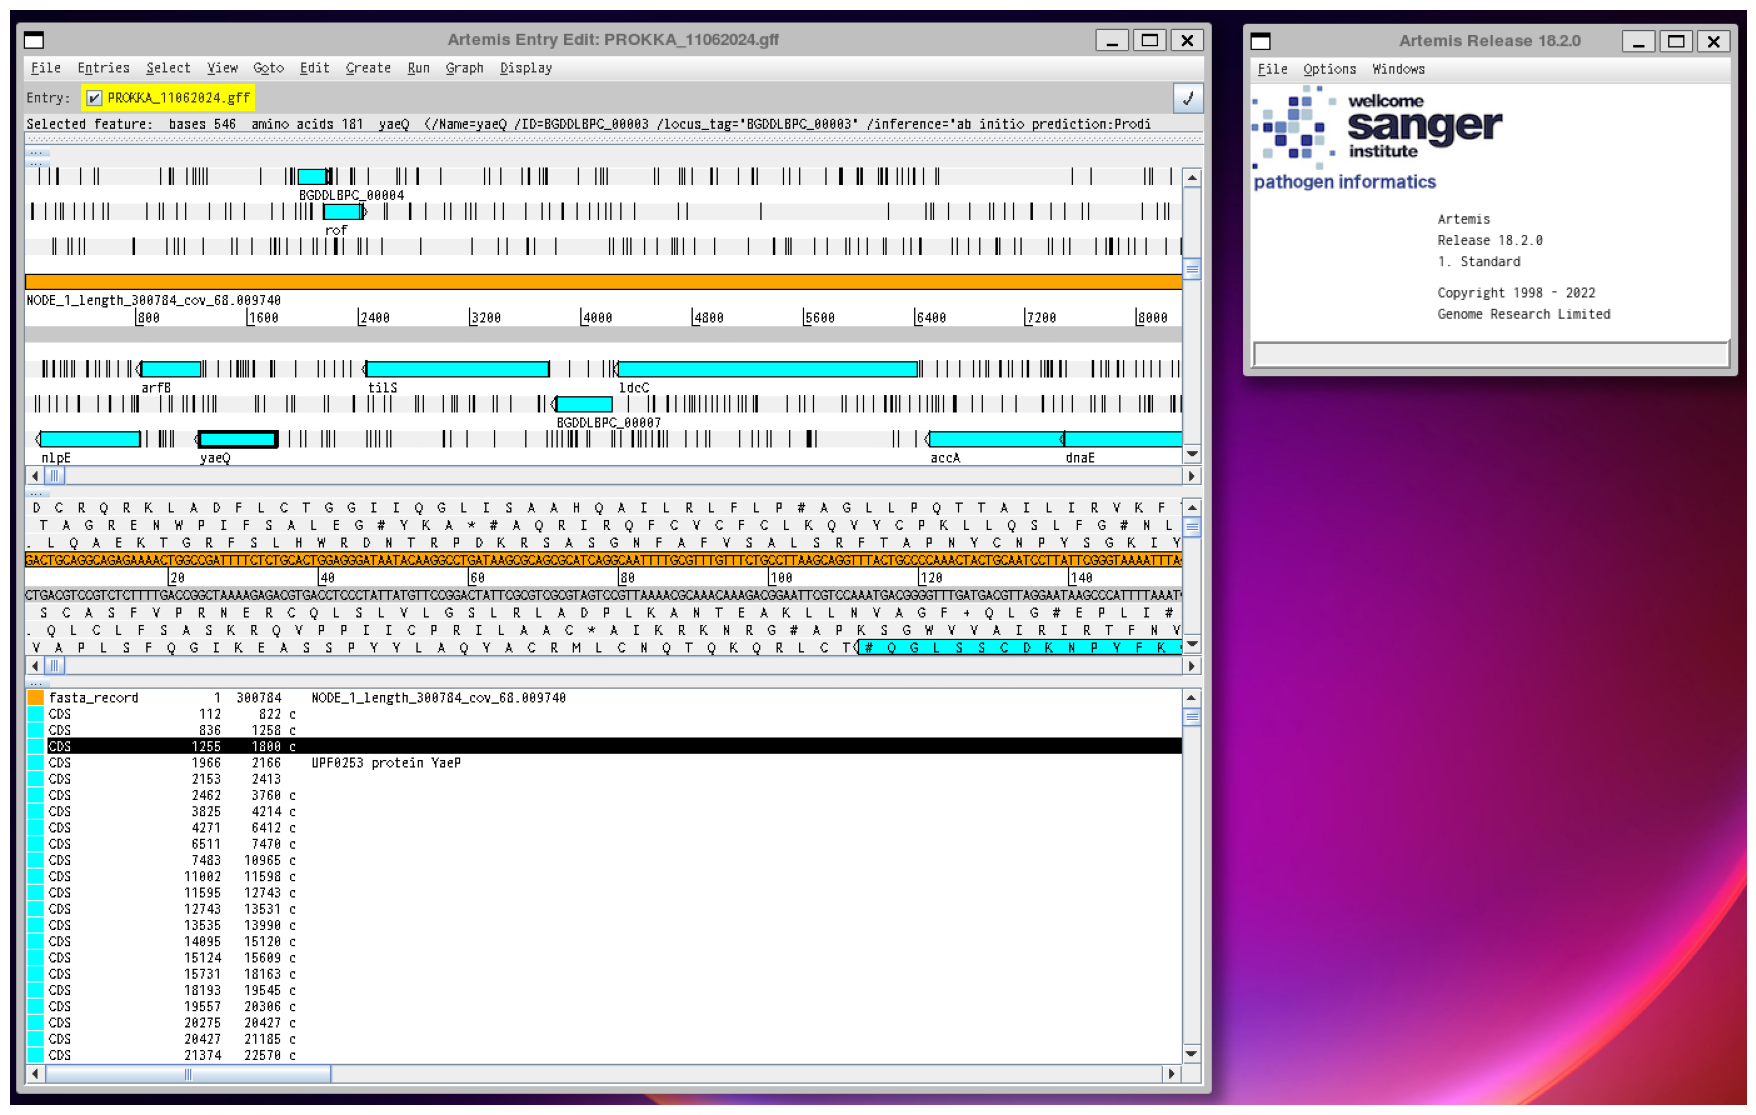

In [26]:
import matplotlib.pyplot as plt
def display_image_in_actual_size(im_path):

    dpi = 80
    im_data = plt.imread(im_path)
    height, width, depth = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')
    
    plt.show()


display_image_in_actual_size('./prokka/prokka_artemis.png')